<a href="https://colab.research.google.com/github/sarwaridas/TheCountOfMonteCristo_NLP/blob/main/NLP_lowcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import nltk.corpus
import numpy as np
from pathlib import Path
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora
#text = nltk.corpus.gutenberg.raw("austen-sense.txt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


Downloading the corpus...

In [15]:
!rm *.txt
!wget https://raw.githubusercontent.com/sarwaridas/TheCountOfMonteCristo_NLP/main/monte-cristo.txt

--2021-11-01 19:28:22--  https://raw.githubusercontent.com/sarwaridas/TheCountOfMonteCristo_NLP/main/monte-cristo.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2705942 (2.6M) [text/plain]
Saving to: ‘monte-cristo.txt’

monte-cristo.txt    100%[===================>]   2.58M  --.-KB/s    in 0.04s   

2021-11-01 19:28:22 (69.4 MB/s) - ‘monte-cristo.txt’ saved [2705942/2705942]



In [16]:
monte_cristo= Path('monte-cristo.txt').read_text()

Exploratory Data Analysis

In [17]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [21]:
montecristo_blob = TextBlob(Path('monte-cristo.txt').read_text())
mc_count = montecristo_blob.word_counts.items()
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop
mc_no_stop_words = remove_stop(mc_count)
mc_no_stop_words[0:10]

['count',
 'monte',
 'cristo',
 'alexandre',
 'dumas',
 'père',
 'contents',
 'volume',
 'one',
 'chapter']

In [66]:
#mc_count

Word Cloud

(-0.5, 399.5, 199.5, -0.5)

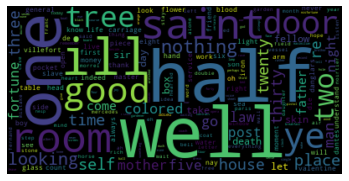

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud_text = str1 = ' '.join(mc_no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


Cloud-based NoCode-LowCode Tool

In [74]:
mc_no_stop_words= [w for w in mc_no_stop_words if w.isalpha()]

In [75]:
from pandas import DataFrame
df = DataFrame(mc_no_stop_words, columns=["monte-cristo-words"])
df.head()

,monte-cristo-words
0,count
1,monte
2,cristo
3,alexandre
4,dumas


In [76]:
df.to_csv("monte-cristo-words.txt",index=False)